### Visualise Laplacian Spherical Harmonics

In [1]:
import numpy as np
from scipy.special import sph_harm

import matplotlib
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource
from matplotlib.animation import FuncAnimation, PillowWriter

import cmasher as cmr

nice_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}",
    "font.family": "serif",
}

plt.rcParams.update(nice_fonts)
plt.style.use('dark_background')

In [2]:
def Y_lm(l, m, theta, phi, z="real"):
    """Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    
    Parameters
    ----------
    """
    if z=="real":
        ylm = sph_harm(m, l, phi, theta).real
    else:
        ylm = sph_harm(m, l, phi, theta).imag

    # Normalize to [0,1]
    ymax, ymin = ylm.max(), ylm.min()
    if ymin != ymax:
        ylm = (ylm - ymin)/(ymax - ymin)
    else:
        ylm = ylm/ymax

    # Illumination
    ls = LightSource(180, 45)
    ylm = ls.shade(ylm, cmap=cmr.wildfire, vert_exag=0.1, blend_mode='soft')
    return ylm

l [0], m: [0], idx: [1]
l [1], m: [0], idx: [6]
l [1], m: [1], idx: [7]
l [2], m: [0], idx: [11]
l [2], m: [1], idx: [12]
l [2], m: [2], idx: [13]
l [3], m: [0], idx: [16]
l [3], m: [1], idx: [17]
l [3], m: [2], idx: [18]
l [3], m: [3], idx: [19]
l [4], m: [0], idx: [21]
l [4], m: [1], idx: [22]
l [4], m: [2], idx: [23]
l [4], m: [3], idx: [24]
l [4], m: [4], idx: [25]


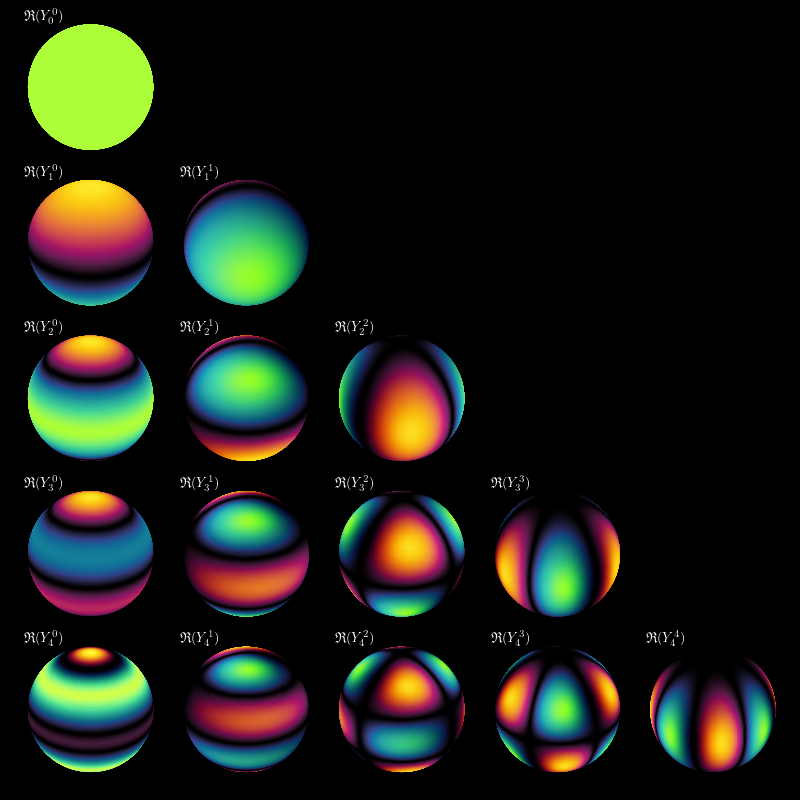

In [3]:
%matplotlib widget
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)

theta = np.linspace(0, np.pi, 2**8)
phi = np.linspace(0, 2*np.pi, 2**8)
theta, phi = np.meshgrid(theta, phi)

# The Cartesian coordinates of the unit sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

max_l = 4
idx=1
surfaces = []
axs = []
for l in range(max_l+1):
    for m in range(max_l+1):
        if m <= l:
            print(f"l [{l}], m: [{m}], idx: [{idx}]")
            ax = fig.add_subplot(max_l+1,max_l+1,idx, projection='3d')
            ax.set_axis_off()
            ax.set_xlim([-0.6, 0.6])
            ax.set_ylim([-0.6, 0.6])
            ax.set_zlim([-0.6, 0.6])
            ax.set_box_aspect([1,1,1])
            axs.append(ax)
            
            ax.set_title(rf'$\mathfrak{{R}}$($Y^{{{m}}}_{{{l}}}$)', fontsize=10, loc='left', pad=-49)
            ylm = Y_lm(l, m, theta, phi, z="real")
            surf = ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=ylm, shade=False)
            surfaces.append(surf)
            # plot_ylm(l, m, fig, ax)
            idx+=1
        else:
            idx+=1

def animate(i):
    for ax in axs:
        ax.view_init(elev=30, azim=0+5*i)
        
    return fig,

ani = FuncAnimation(fig, animate, frames=72, interval=50, blit=True)
ani.save(f"gifs/ylm.gif", dpi=300, writer=PillowWriter(fps=24))
    
plt.show()